In [120]:
pd.reset_option('display.max_rows')

In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [91]:
# Now we need to read in the data
df = pd.read_csv(r'movies.csv')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [94]:
df = df.sort_index(axis=1)

In [95]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


Problem Statement: To find what fields affect Gross Revenue and how?


In [99]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    Percent_missing = np.mean(df[col].isnull())
    print('{column_name} - {percentage}%'.format(column_name = col,percentage =  round(Percent_missing*100) ))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [100]:
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [102]:
# Data Types for our columns

print(df.dtypes)

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object


In [103]:
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,90000000.0,Columbia Pictures,United States,Adil El Arbi,Action,426505244.0,Bad Boys for Life,R,"January 17, 2020 (United States)",124.0,6.6,Will Smith,140000.0,Peter Craig,2020
7649,85000000.0,Paramount Pictures,United States,Jeff Fowler,Action,319715683.0,Sonic the Hedgehog,PG,"February 14, 2020 (United States)",99.0,6.5,Ben Schwartz,102000.0,Pat Casey,2020
7650,175000000.0,Universal Pictures,United States,Stephen Gaghan,Adventure,245487753.0,Dolittle,PG,"January 17, 2020 (United States)",101.0,5.6,Robert Downey Jr.,53000.0,Stephen Gaghan,2020
7651,135000000.0,20th Century Studios,Canada,Chris Sanders,Adventure,111105497.0,The Call of the Wild,PG,"February 21, 2020 (United States)",100.0,6.8,Harrison Ford,42000.0,Michael Green,2020


In [104]:

# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000.0,Twentieth Century Fox,United States,James Cameron,Action,2.847246e+09,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009
7445,356000000.0,Marvel Studios,United States,Anthony Russo,Action,2.797501e+09,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019
3045,200000000.0,Twentieth Century Fox,United States,James Cameron,Drama,2.201647e+09,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997
6663,245000000.0,Lucasfilm,United States,J.J. Abrams,Action,2.069522e+09,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015
7244,321000000.0,Marvel Studios,United States,Anthony Russo,Action,2.048360e+09,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000.0,Two Prong Lesson,United States,Francesca Gregorini,Drama,5.073000e+03,Tanner Hall,R,"January 15, 2015 (Sweden)",96.0,5.8,Rooney Mara,3500.0,Tatiana von Fürstenberg,2009
2434,5000000.0,Trimark Pictures,United States,Stephen Cornwell,Action,2.970000e+03,Philadelphia Experiment II,PG-13,"June 4, 1994 (South Korea)",97.0,4.5,Brad Johnson,1900.0,Wallace C. Bennett,1993
3681,5000000.0,Copperheart Entertainment,Canada,John Fawcett,Drama,2.554000e+03,Ginger Snaps,Not Rated,"May 11, 2001 (Canada)",108.0,6.8,Emily Perkins,43000.0,Karen Walton,2000
272,800000.0,Embassy Pictures,United States,Charles Band,Horror,2.270000e+03,Parasite,R,"March 12, 1982 (United States)",85.0,3.9,Robert Glaudini,2300.0,Alan J. Adler,1982


<AxesSubplot:xlabel='gross', ylabel='budget'>

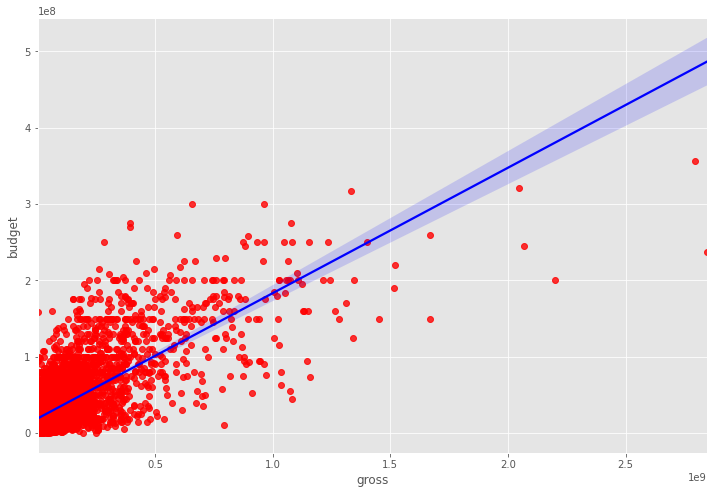

In [69]:
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

<AxesSubplot:xlabel='score', ylabel='gross'>

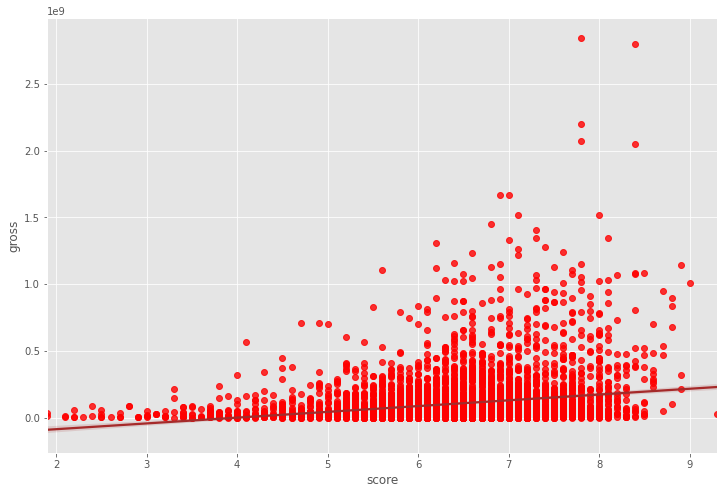

In [106]:
sns.regplot(x="score", y="gross", data=df, scatter_kws={"color":"red"},line_kws={"color":"brown"})

In [107]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


In [108]:
df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.512057,0.231278,-0.006406,0.346274,0.220833
gross,0.512057,1.000000,0.176979,0.124943,0.553625,0.239539
runtime,0.231278,0.176979,1.000000,0.292254,0.205344,0.064824
score,-0.006406,0.124943,0.292254,1.000000,0.350185,0.039389
votes,0.346274,0.553625,0.205344,0.350185,1.000000,0.296512
year,0.220833,0.239539,0.064824,0.039389,0.296512,1.000000


In [109]:
df.corr(method ='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.692958,0.330794,-0.009971,0.493461,0.312886
gross,0.692958,1.000000,0.257400,0.183192,0.745793,0.351045
runtime,0.330794,0.257400,1.000000,0.412155,0.300621,0.095444
score,-0.009971,0.183192,0.412155,1.000000,0.495409,0.057741
votes,0.493461,0.745793,0.300621,0.495409,1.000000,0.427623
year,0.312886,0.351045,0.095444,0.057741,0.427623,1.000000


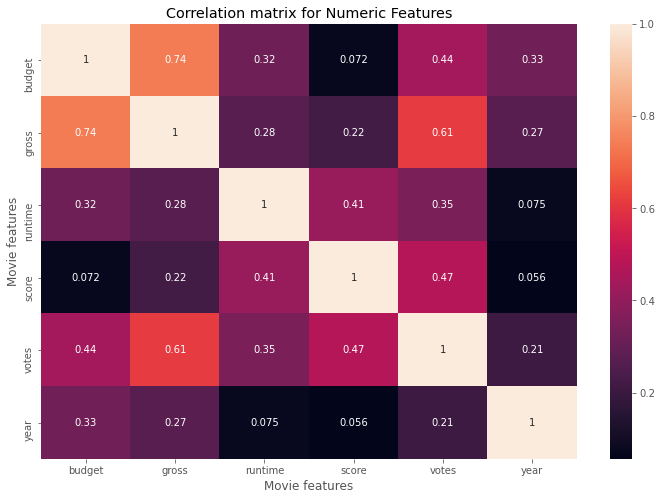

In [110]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [111]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,-0.053573,0.016348,0.124051,0.020893,0.305284,0.288955,0.203698,0.309616,0.134894,-0.005493,0.138015,0.359065,0.208088,0.319135
company,-0.053573,1.000000,0.153912,0.483737,0.015127,0.545924,0.535369,-0.026286,0.546033,-0.010695,-0.008555,0.442307,0.007423,0.477503,0.537731
country,0.016348,0.153912,1.000000,0.095349,-0.003314,0.094820,0.098110,-0.004547,0.096807,0.040813,0.016567,0.098071,-0.021562,0.098623,0.095073
director,0.124051,0.483737,0.095349,1.000000,0.036671,0.751737,0.725411,0.096014,0.750825,-0.026918,-0.006583,0.636705,0.187909,0.717990,0.747785
genre,0.020893,0.015127,-0.003314,0.036671,1.000000,0.032033,0.028413,-0.116507,0.031251,0.000056,-0.027402,0.045497,-0.009983,0.033975,0.031765
gross,0.305284,0.545924,0.094820,0.751737,0.032033,1.000000,0.967925,0.172703,0.998490,0.047728,-0.015744,0.720811,0.307248,0.811356,0.996371
name,0.288955,0.535369,0.098110,0.725411,0.028413,0.967925,1.000000,0.169808,0.966086,0.048980,-0.020083,0.695124,0.297305,0.791872,0.965461
rating,0.203698,-0.026286,-0.004547,0.096014,-0.116507,0.172703,0.169808,1.000000,0.171063,0.032265,0.036114,0.115694,0.097619,0.128909,0.179456
released,0.309616,0.546033,0.096807,0.750825,0.031251,0.998490,0.966086,0.171063,1.000000,0.049650,-0.019486,0.720076,0.313254,0.809858,0.996490
runtime,0.134894,-0.010695,0.040813,-0.026918,0.000056,0.047728,0.048980,0.032265,0.049650,1.000000,0.011831,0.033297,0.126362,0.023123,0.055864


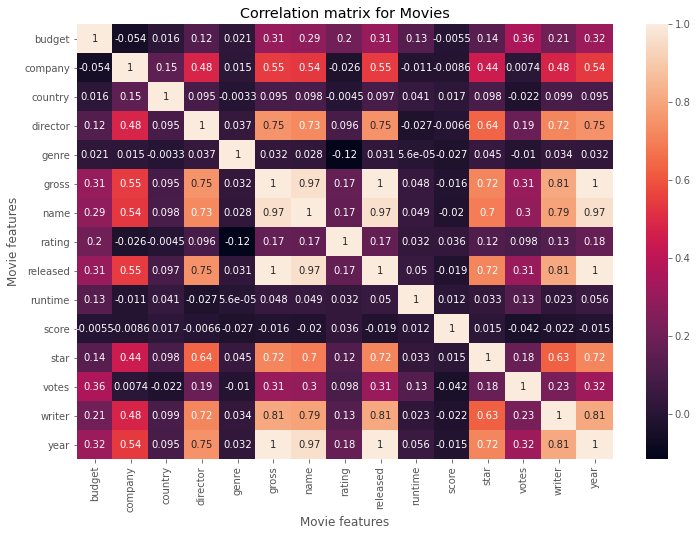

In [112]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [113]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget  budget      1.000000
        company    -0.053573
        country     0.016348
        director    0.124051
        genre       0.020893
                      ...   
year    score      -0.014594
        star        0.719373
        votes       0.323916
        writer      0.812386
        year        1.000000
Length: 225, dtype: float64


In [114]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre     rating     -0.116507
rating    genre      -0.116507
budget    company    -0.053573
company   budget     -0.053573
score     votes      -0.041981
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64


In [116]:
pd.set_option('display.max_rows',None)

In [117]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company   name        0.535369
name      company     0.535369
year      company     0.537731
company   year        0.537731
          gross       0.545924
gross     company     0.545924
company   released    0.546033
released  company     0.546033
star      writer      0.626647
writer    star        0.626647
star      director    0.636705
director  star        0.636705
star      name        0.695124
name      star        0.695124
writer    director    0.717990
director  writer      0.717990
star      year        0.719373
year      star        0.719373
released  star        0.720076
star      released    0.720076
          gross       0.720811
gross     star        0.720811
director  name        0.725411
name      director    0.725411
director  year        0.747785
year      director    0.747785
released  director    0.750825
director  released    0.750825
gross     director    0.751737
director  gross       0.751737
name      writer      0.791872
writer    name        0.791872
        

In [ ]:
pd.reset_option('display.max_rows')

In [118]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [158]:
df['CorrectYear'] = df['released'].str.split(',',expand=True)[1].str[1:5]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year,CorrectYear
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,June 13,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,July 2,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,June 20,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,July 2,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,July 25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,90000000.0,Columbia Pictures,United States,Adil El Arbi,Action,426505244.0,Bad Boys for Life,R,"January 17, 2020 (United States)",124.0,6.6,Will Smith,140000.0,Peter Craig,2020,January 17,2020
7649,85000000.0,Paramount Pictures,United States,Jeff Fowler,Action,319715683.0,Sonic the Hedgehog,PG,"February 14, 2020 (United States)",99.0,6.5,Ben Schwartz,102000.0,Pat Casey,2020,February 14,2020
7650,175000000.0,Universal Pictures,United States,Stephen Gaghan,Adventure,245487753.0,Dolittle,PG,"January 17, 2020 (United States)",101.0,5.6,Robert Downey Jr.,53000.0,Stephen Gaghan,2020,January 17,2020
7651,135000000.0,20th Century Studios,Canada,Chris Sanders,Adventure,111105497.0,The Call of the Wild,PG,"February 21, 2020 (United States)",100.0,6.8,Harrison Ford,42000.0,Michael Green,2020,February 21,2020


In [159]:
df.groupby(['company', 'CorrectYear'])[["gross"]].sum()

gross
company                             CorrectYear             
"DIA" Productions GmbH & Co. KG     2003          44350926.0
"Weathering With You" Film Partners 2020         193457467.0
.406 Production                     1997             10580.0
1492 Pictures                       1996         129832389.0
                                    1999          87423861.0
...                                                      ...
erbp                                2013            587174.0
i am OTHER                          2015          17986781.0
i5 Films                            2001          10031529.0
micro_scope                         2011           7099598.0
thefyzz                             2017          62198461.0

[2989 rows x 1 columns]

In [160]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [161]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

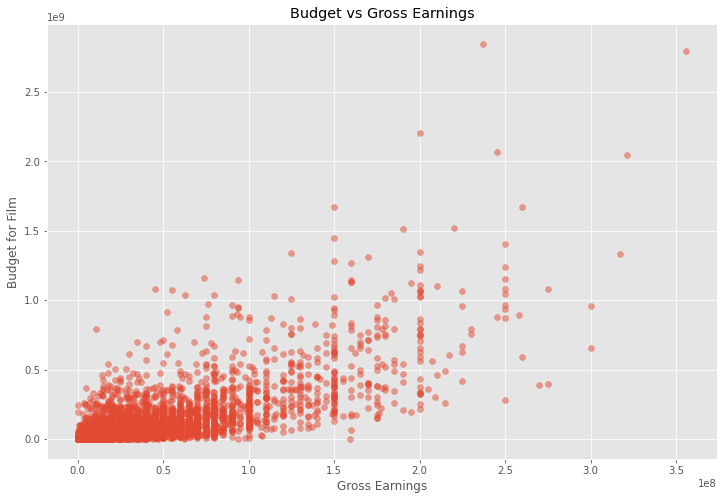

In [162]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [163]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year,CorrectYear
0,19000000.0,1426,46,1795,6,46998772.0,4692,6,1304,146.0,8.4,699,927000.0,2832,1980,193,0
1,4500000.0,452,47,1578,1,58853106.0,3929,6,1127,104.0,5.8,214,65000.0,1158,1980,169,0
2,18000000.0,945,47,757,0,538375067.0,3641,4,1359,124.0,8.7,1157,1200000.0,1818,1980,201,0
3,3500000.0,1108,47,889,4,83453539.0,204,4,1127,88.0,7.7,1474,221000.0,1413,1980,169,0
4,6000000.0,1083,47,719,4,39846344.0,732,6,1170,98.0,7.3,271,108000.0,351,1980,175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,90000000.0,452,47,16,0,426505244.0,415,6,904,124.0,6.6,1812,140000.0,2390,2020,134,40
7649,85000000.0,1108,47,852,0,319715683.0,3556,4,713,99.0,6.5,147,102000.0,2309,2020,102,40
7650,175000000.0,1397,47,1809,1,245487753.0,1153,4,904,101.0,5.6,1470,53000.0,2827,2020,134,40
7651,135000000.0,12,6,294,1,111105497.0,3978,4,758,100.0,6.8,640,42000.0,2091,2020,110,40


In [164]:
df_numerized.corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Year,CorrectYear
budget,1.000000,0.170235,0.052977,-0.009662,-0.368523,0.740247,0.023392,-0.203946,0.019952,0.318695,0.072001,-0.021473,0.439675,-0.039466,0.327722,0.017284,0.321624
company,0.170235,1.000000,0.048569,-0.008223,-0.071334,0.149553,0.021697,-0.092357,-0.002407,0.037585,0.020656,0.014082,0.118470,-0.003697,-0.014333,-0.002736,-0.015587
country,0.052977,0.048569,1.000000,0.011133,-0.009164,0.060078,-0.025490,0.008230,-0.017228,-0.034477,-0.043051,-0.009990,0.041551,0.022488,-0.066748,-0.017601,-0.072407
director,-0.009662,-0.008223,0.011133,1.000000,-0.008553,-0.029560,0.015246,0.014656,0.002308,0.017433,0.005413,0.036593,-0.010376,0.261735,-0.038354,0.002420,-0.035738
genre,-0.368523,-0.071334,-0.009164,-0.008553,1.000000,-0.244101,0.010996,0.147796,0.022142,-0.059237,0.035106,0.003341,-0.135990,0.017578,-0.073167,0.022610,-0.070699
gross,0.740247,0.149553,0.060078,-0.029560,-0.244101,1.000000,0.005639,-0.181906,0.008501,0.275796,0.222556,-0.000004,0.614751,-0.035885,0.274321,0.006250,0.269479
name,0.023392,0.021697,-0.025490,0.015246,0.010996,0.005639,1.000000,-0.029234,-0.006152,0.010850,0.014450,-0.006882,0.012615,0.012880,0.025542,-0.006549,0.026759
rating,-0.203946,-0.092357,0.008230,0.014656,0.147796,-0.181906,-0.029234,1.000000,0.018083,0.140792,0.065983,0.009196,0.006031,-0.003149,0.019499,0.018990,0.019560
released,0.019952,-0.002407,-0.017228,0.002308,0.022142,0.008501,-0.006152,0.018083,1.000000,0.008975,0.045874,0.015706,0.028833,0.008072,-0.001740,0.999839,-0.005141
runtime,0.318695,0.037585,-0.034477,0.017433,-0.059237,0.275796,0.010850,0.140792,0.008975,1.000000,0.414068,0.010108,0.352303,-0.017561,0.075077,0.007211,0.076666


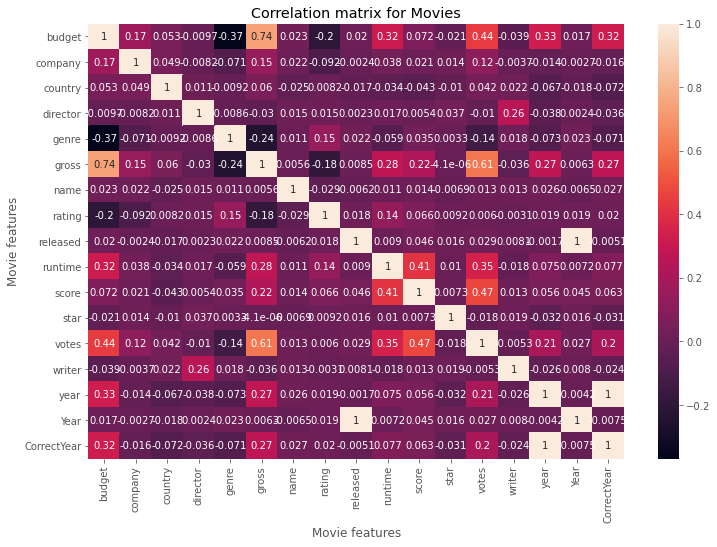

In [165]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

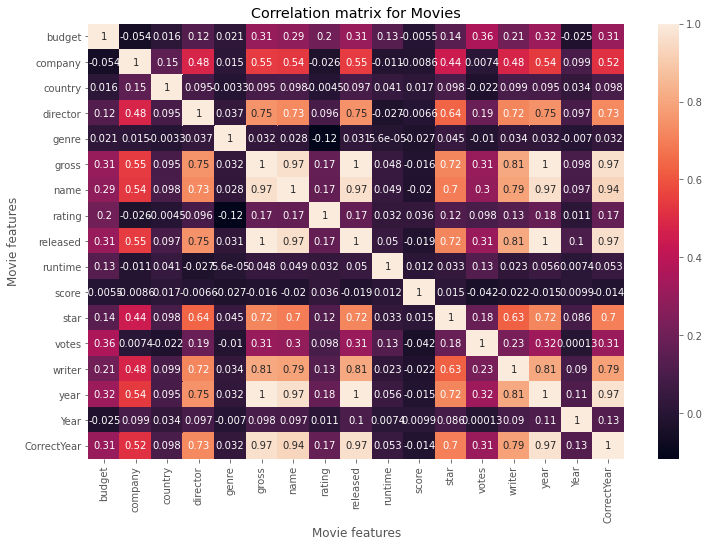

In [166]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()